In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
cigs = pd.read_csv('cigs.csv')

In [6]:
cigs = cigs.dropna()

In [7]:
cigs.head()

,Brand_Name,flavor,CO,nic,tar,size,filter,pack,menthol
1,Alpine,Lt,12,0.8,10.0,100,F,SP,yes
3,Alpine,Lt,11,0.7,10.0,King,F,HP,yes
5,Alpine,Lt,10,0.7,9.0,King,F,SP,yes
6,American,FF,16,0.9,14.0,100,F,SP,no
7,American,Lt,13,0.7,10.0,100,F,SP,no


In [8]:
cigs.corr()

,CO,nic,tar
CO,1.000000,0.706568,0.873473
nic,0.706568,1.000000,0.908553
tar,0.873473,0.908553,1.000000


In [9]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
from sklearn.model_selection import train_test_split

In [15]:
cigs_train, cigs_test = train_test_split(cigs, test_size=0.3, random_state=42, stratify=cigs['pack'])
print(cigs_train.shape, cigs_test.shape)

(634, 9) (273, 9)


In [27]:
features= ['tar', 'CO']
dt_regression = DecisionTreeRegressor(max_depth = 2) # Increase max_depth to see effect in the plot
dt_regression.fit(cigs_train[features], cigs_train['nic'])

DecisionTreeRegressor(max_depth=2)

In [28]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

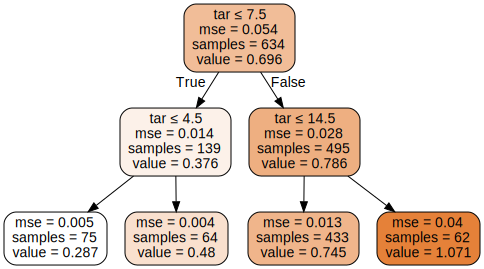

In [29]:
plot_tree_regression(dt_regression, features)

In [30]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [31]:
predictionsOnTrainset = dt_regression.predict(cigs_train[features])
predictionsOnTestset = dt_regression.predict(cigs_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, cigs_train.nic)
rmseTest = calculate_rmse(predictionsOnTestset, cigs_test.nic)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 0.11762449339444593
RMSE on test set 0.11229528088149056


Deze accuracy is vrijwel hetzelfde. Ik had dit wel verwacht omdat de hoeveelheid tar en CO gewoon in lijn staan met de ehoeveelheid nicotine een sigaret dus bevat. Hoe meer tar en CO hoe meer nicotine de sigaret waarschijnlijk bevat. De accuracy is ongeveer 10% van de "actual values" dat is dus niet slecht maar ook niet heel goed.

Deze tree vind ik wel een stuk beter te begrijpen, wanneer de tar hoger is zal de nico ook hoger zijn en andersom